In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("financial_data.xlsx")
df

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,Microsoft,2024,245122,88136,512163,243686,118548
1,Microsoft,2023,211915,72361,411976,205753,87582
2,Microsoft,2022,198270,72738,364840,198298,89035
3,Tesla,2024,97690,7153,122070,48390,14923
4,Tesla,2023,96773,14974,106618,43009,13256
5,Tesla,2022,81462,12587,82338,36440,14724
6,Apple,2024,391035,93736,364980,308030,118254
7,Apple,2023,383285,96995,352583,290437,110543
8,Apple,2022,394328,99803,352755,302083,122151


In [43]:
df.sort_values(by=['Company', 'Fiscal Year'], ascending=[True, True], inplace=True)

In [44]:
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Cash Flow from Operating Activities'].pct_change() * 100

In [45]:
df

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
8,Apple,2022,394328,99803,352755,302083,122151,NaN,NaN,NaN,NaN,NaN
7,Apple,2023,383285,96995,352583,290437,110543,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992
6,Apple,2024,391035,93736,364980,308030,118254,2.021994,-3.359967,3.516052,6.057424,6.975566
2,Microsoft,2022,198270,72738,364840,198298,89035,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2023,211915,72361,411976,205753,87582,6.882030,-0.518299,12.919636,3.759493,-1.631942
0,Microsoft,2024,245122,88136,512163,243686,118548,15.669962,21.800417,24.318650,18.436183,35.356580
5,Tesla,2022,81462,12587,82338,36440,14724,NaN,NaN,NaN,NaN,NaN
4,Tesla,2023,96773,14974,106618,43009,13256,18.795267,18.964010,29.488207,18.026894,-9.970117
3,Tesla,2024,97690,7153,122070,48390,14923,0.947578,-52.230533,14.492862,12.511335,12.575438


In the DataFrame above, we can see that the `pct_change()` has produced several `NaN` rows inside the `Revenue Growth (%)`, `Net Income Growth (%)`, `Assets Growth (%)` columns. This is because `pct_change()` calculates the percentage change between the current row and the **previous row**, grouped by company. So, for the first year of each company, there is **no previous year to compare**, which results in `NaN`.

In this case, we should keep the `NaN` rows for the sake of data integrity. This is important if you want to tell stakeholders that growth cannot be computed for the first year. Replacing `NaN` with "0" could be misleading because "0%" does not equal "undefined".

## Now let's assess these companies' financial health

### The first one is Profit Margin (%)

In [46]:
df['Profit Margin (%)'] = (df['Net Income'] / df['Total Revenue']) * 100

Profit margin tells you how much revenue turns into profit after all expenses. When the profit margin is high, it means that the company is very efficient at turning sales into earnings.

### The second one is Debt-to-Asset Ratio (%)

In [47]:
df['Debt to Asset Ratio (%)'] = (df['Total Liabilities'] / df['Total Assets']) * 100

This one shows you the percentage of a company's assests that are financially covered by debt. When the ratio is high, it means that the company is in a risky financial situation because the company has a lot of debt.

### And the third one is Cash Flow Margin (%)

In [48]:
df['Cash Flow Margin (%)'] = (df['Cash Flow from Operating Activities'] / df['Total Revenue']) * 100

This one is very tricky and crucial as it shows how much actual cash a company keeps from every dollar it earns in sales. This time we should only focus only on cash from operations to understand the core business.

Revenue tells us the total sales made during a period, while Cash Flow from Operations (CFO) tells us how much actual cash was generated by running the business.

Dividing CFO by Revenue gives you the Cash Flow Margin (%) and this ratio is very important for a company as it is a critical measure of liquidity and operational health.

Liquidity means how much easily companies can access their cash, and companies care deeply about this because they can be rich on paper (high revenue or profit), but broke in real life (no cash). When they don't have enough cash on hand, they can't pay employees, buy materials/inventory, repay loans, survive crisis, etc. 

This is why Cash Flow Margin (%), indeed, is very important.

In [49]:
df

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%),Profit Margin (%),Debt to Asset Ratio (%),Cash Flow Margin (%)
8,Apple,2022,394328,99803,352755,302083,122151,NaN,NaN,NaN,NaN,NaN,25.309641,85.635356,30.977004
7,Apple,2023,383285,96995,352583,290437,110543,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992,25.306234,82.374079,28.840941
6,Apple,2024,391035,93736,364980,308030,118254,2.021994,-3.359967,3.516052,6.057424,6.975566,23.971256,84.396405,30.241283
2,Microsoft,2022,198270,72738,364840,198298,89035,NaN,NaN,NaN,NaN,NaN,36.686337,54.352045,44.905936
1,Microsoft,2023,211915,72361,411976,205753,87582,6.882030,-0.518299,12.919636,3.759493,-1.631942,34.146238,49.942958,41.328835
0,Microsoft,2024,245122,88136,512163,243686,118548,15.669962,21.800417,24.318650,18.436183,35.356580,35.955973,47.579774,48.362856
5,Tesla,2022,81462,12587,82338,36440,14724,NaN,NaN,NaN,NaN,NaN,15.451376,44.256601,18.074685
4,Tesla,2023,96773,14974,106618,43009,13256,18.795267,18.964010,29.488207,18.026894,-9.970117,15.473324,40.339342,13.698036
3,Tesla,2024,97690,7153,122070,48390,14923,0.947578,-52.230533,14.492862,12.511335,12.575438,7.322141,39.641189,15.275873


## Company-Level Aggregate

In [50]:
print("\n=== Average Growth by Company ===")
print(df.groupby('Company')[[
    'Revenue Growth (%)',
    'Net Income Growth (%)',
    'Assets Growth (%)',
    'Liabilities Growth (%)',
    'Cash Flow Growth (%)'
]].mean().round(2))


=== Average Growth by Company ===
           Revenue Growth (%)  Net Income Growth (%)  Assets Growth (%)  \
Company                                                                   
Apple                   -0.39                  -3.09               1.73   
Microsoft               11.28                  10.64              18.62   
Tesla                    9.87                 -16.63              21.99   

           Liabilities Growth (%)  Cash Flow Growth (%)  
Company                                                  
Apple                        1.10                 -1.26  
Microsoft                   11.10                 16.86  
Tesla                       15.27                  1.30  


In [51]:
print("\n=== Average Profit Metrics ===")
print(df.groupby('Company')[[
    'Profit Margin (%)',
    'Debt to Asset Ratio (%)',
    'Cash Flow Margin (%)'
]].mean().round(2))


=== Average Profit Metrics ===
           Profit Margin (%)  Debt to Asset Ratio (%)  Cash Flow Margin (%)
Company                                                                    
Apple                  24.86                    84.14                 30.02
Microsoft              35.60                    50.62                 44.87
Tesla                  12.75                    41.41                 15.68


# Absolute Financial Power Over Time
This visualization shows us the raw financial strength of each company over time.

In [52]:
# Set plot style for every visualization
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10, 6)

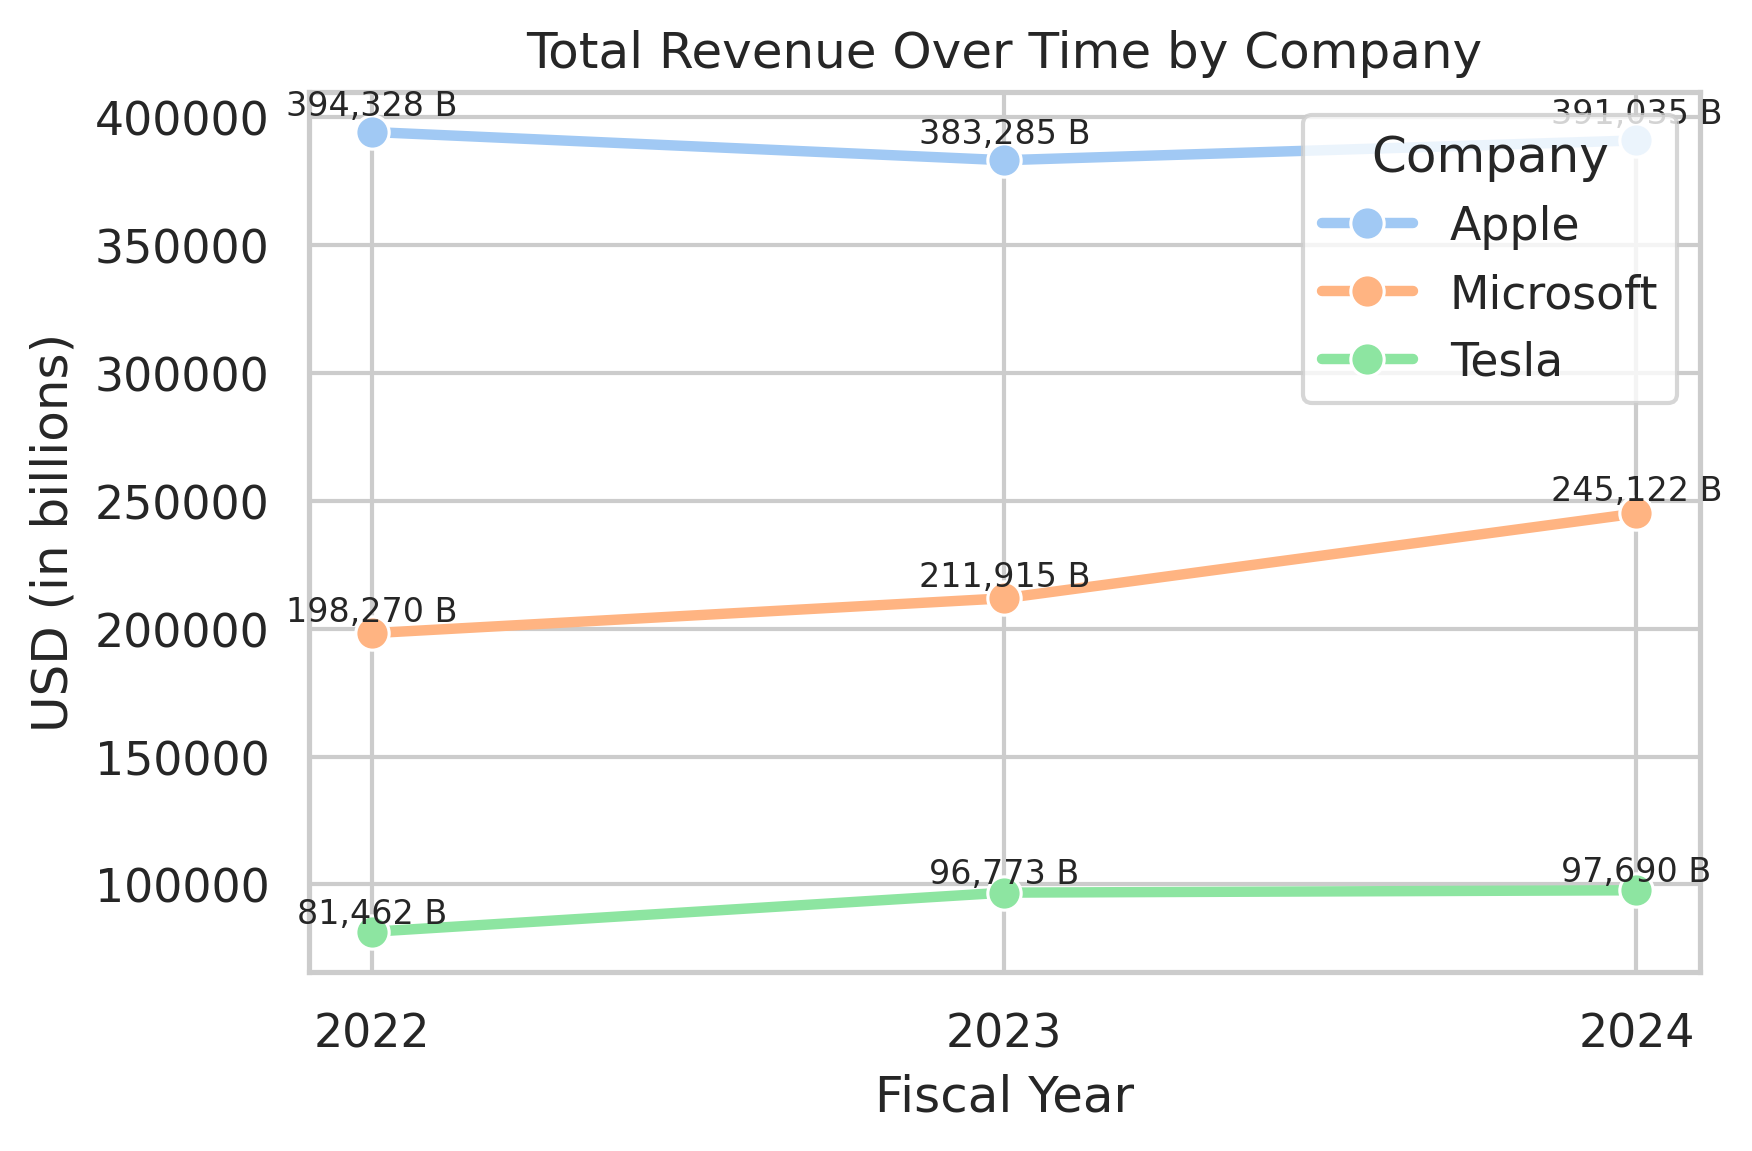

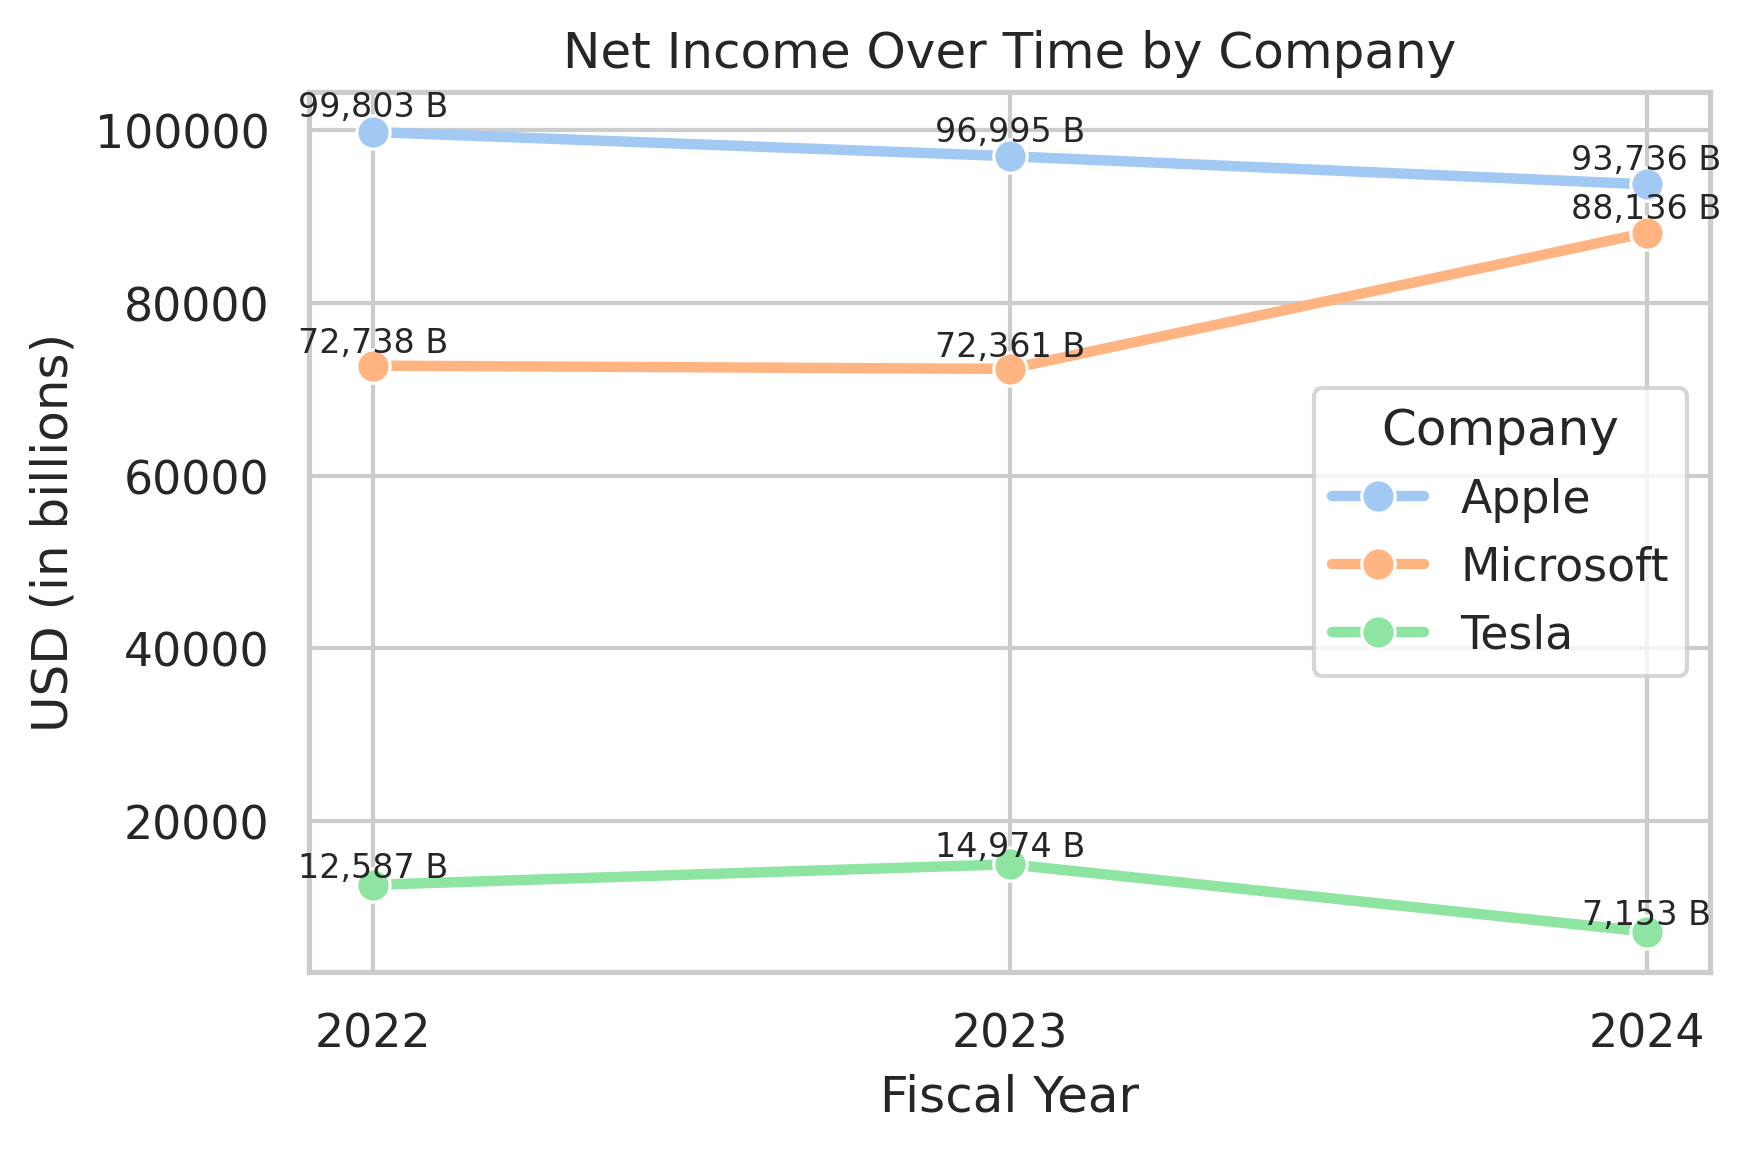

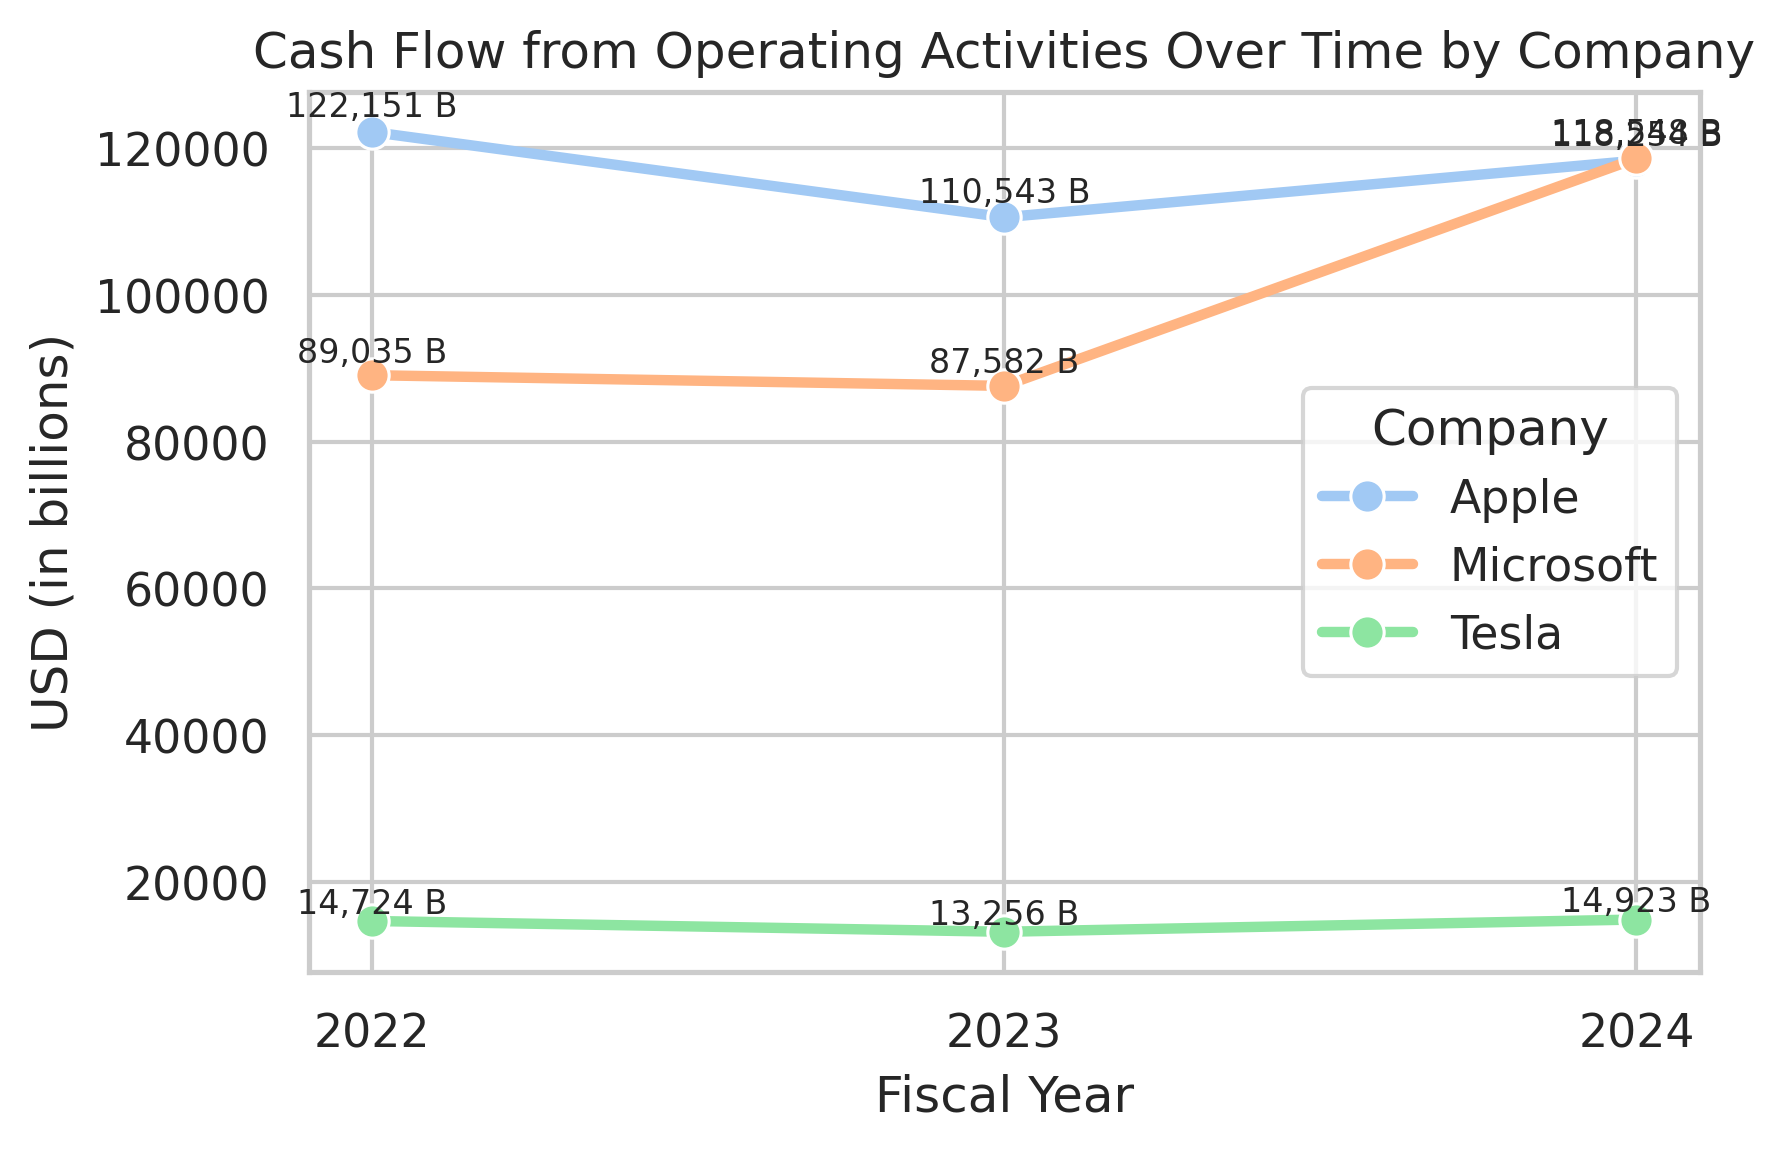

In [53]:
metrics = ['Total Revenue', 'Net Income', 'Cash Flow from Operating Activities']
for metric in metrics:
    plt.figure(figsize=(6, 4), dpi=300)
    ax = sns.lineplot(data=df, x="Fiscal Year", y=metric, hue="Company", 
                 marker="o", linewidth=2.5, markersize=8)
    plt.title(f"{metric} Over Time by Company")
    plt.ylabel("USD (in billions)")
    plt.xlabel("Fiscal Year")
    plt.xticks(sorted(df['Fiscal Year'].unique()))
    plt.legend(title="Company")

    for company in df['Company'].unique():
        company_data = df[df['Company'] == company]
        for x, y in zip(company_data['Fiscal Year'], company_data[metric]):
            if pd.notnull(y):
                ax.text(x, y + (y * 0.01), f'{int(y):,} B', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

## Year-Over-Year Growth Assessment
### Apple
- Despite a slight rebound in revenue in FY2024, Apple's net income has declined for two consecutive years, dropping a total of 6.1% since FY2022.
- Apple's operating cash flow 9.5% drop in FY2023 followed by 7% recovery in FY2024 suggests unpredictability in generating actual cash.
- Apple is still highly profitable, even though their profit growth consistency is quite lacking. This signals a period of maturity or plateuing.

### Microsoft
- Their revenue has grown consistently, with a massive jump of 33.2B (15.6%) in FY2024
- Net income slighlty declined in FY2023 (only 0.5%), but then significanty increased by 15.8B (21.8%) in FY2024.
- Operating cash flow rebounded from a small dip in FY2023 with a huge 30.9B  (+35.3%) increase in FY2024, they generated a lot more cash than before. This highlights their exceptional operational performance.
- Microsoft is growing rapidly on every metrics. Revenue, profit, and cash flow form operating activities are all scaling together.

### Tesla
- Tesla showed impressive revenue and net income (profit) growth only in FY2023. In FY2024, they hit a wall.
- Revenue growth slowed to just +0.9%
- Net income massively collapsed by 52.2%
- Cash flow rebounded slightly but stayed close to FY2022 levels.
- Tesla is struggling to maintain profits despite high sales.

## Does More Revenue Lead to More Profit?
Not always. Microsoft shows a direct and healthy correlation between revenue and profit. Apple’s revenue gains have not translated to profit growth. While Tesla’s divergence (flat revenue, collapsing profit) highlights deteriorating margins.

## Who Generates the Most Operating Cash?
Microsoft leads again, beating Apple by 249M. They both generate very high operating cash flow in FY2024, which can fund R&D (Research & Development), M&A (Mergers & Acquisitions), CapEx (Capital Expenditures), dividends, daily operating expenses (like paying employee salaries), cash reservation for emergencies, etc.

## Conclusion
In FY2024, Microsoft outperformed both Apple and Tesla on all core financial power aspect: revenue, net income, and cash flow from operating activities. It's true that Apple remains a financial giant relative to their size, but they're still facing profit decline. Tesla’s performance is volatile, with FY2024 marking a concerning decline in profitability despite steady revenue.

# Efficiency & Quality Ratios
This visualization shows us how well they manage their revenue to generate profit and cash, regardless of size.

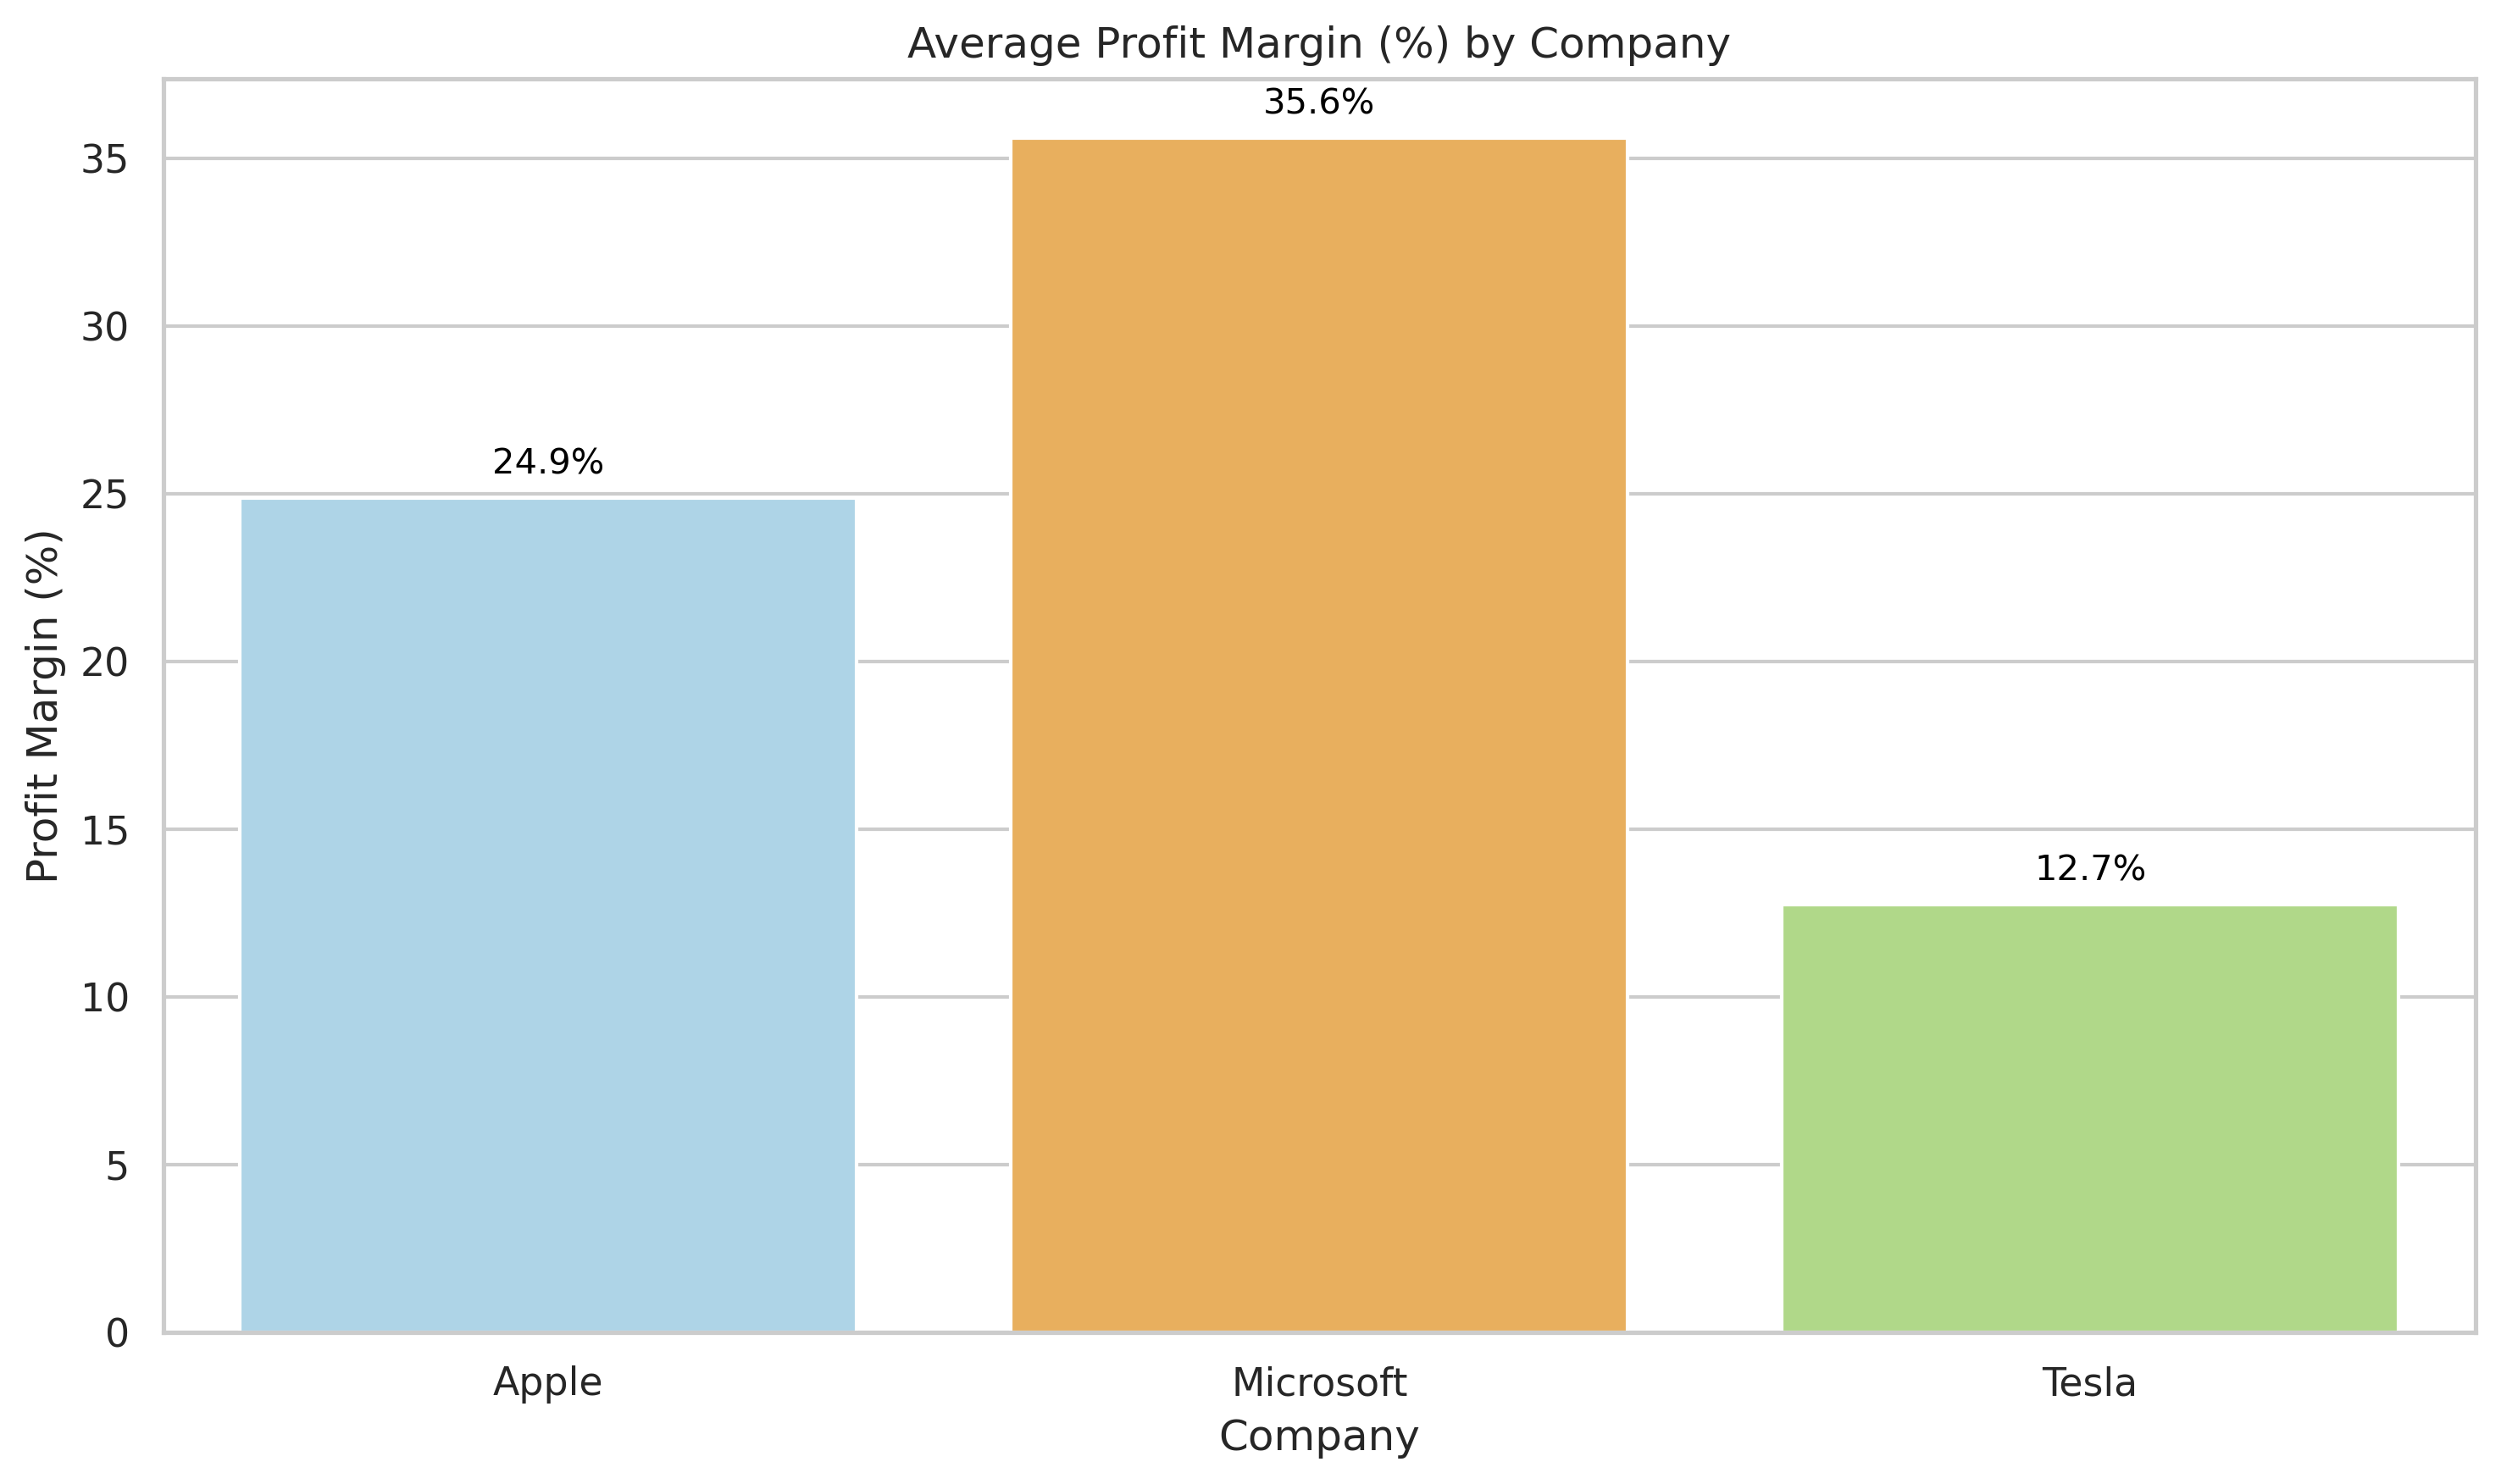

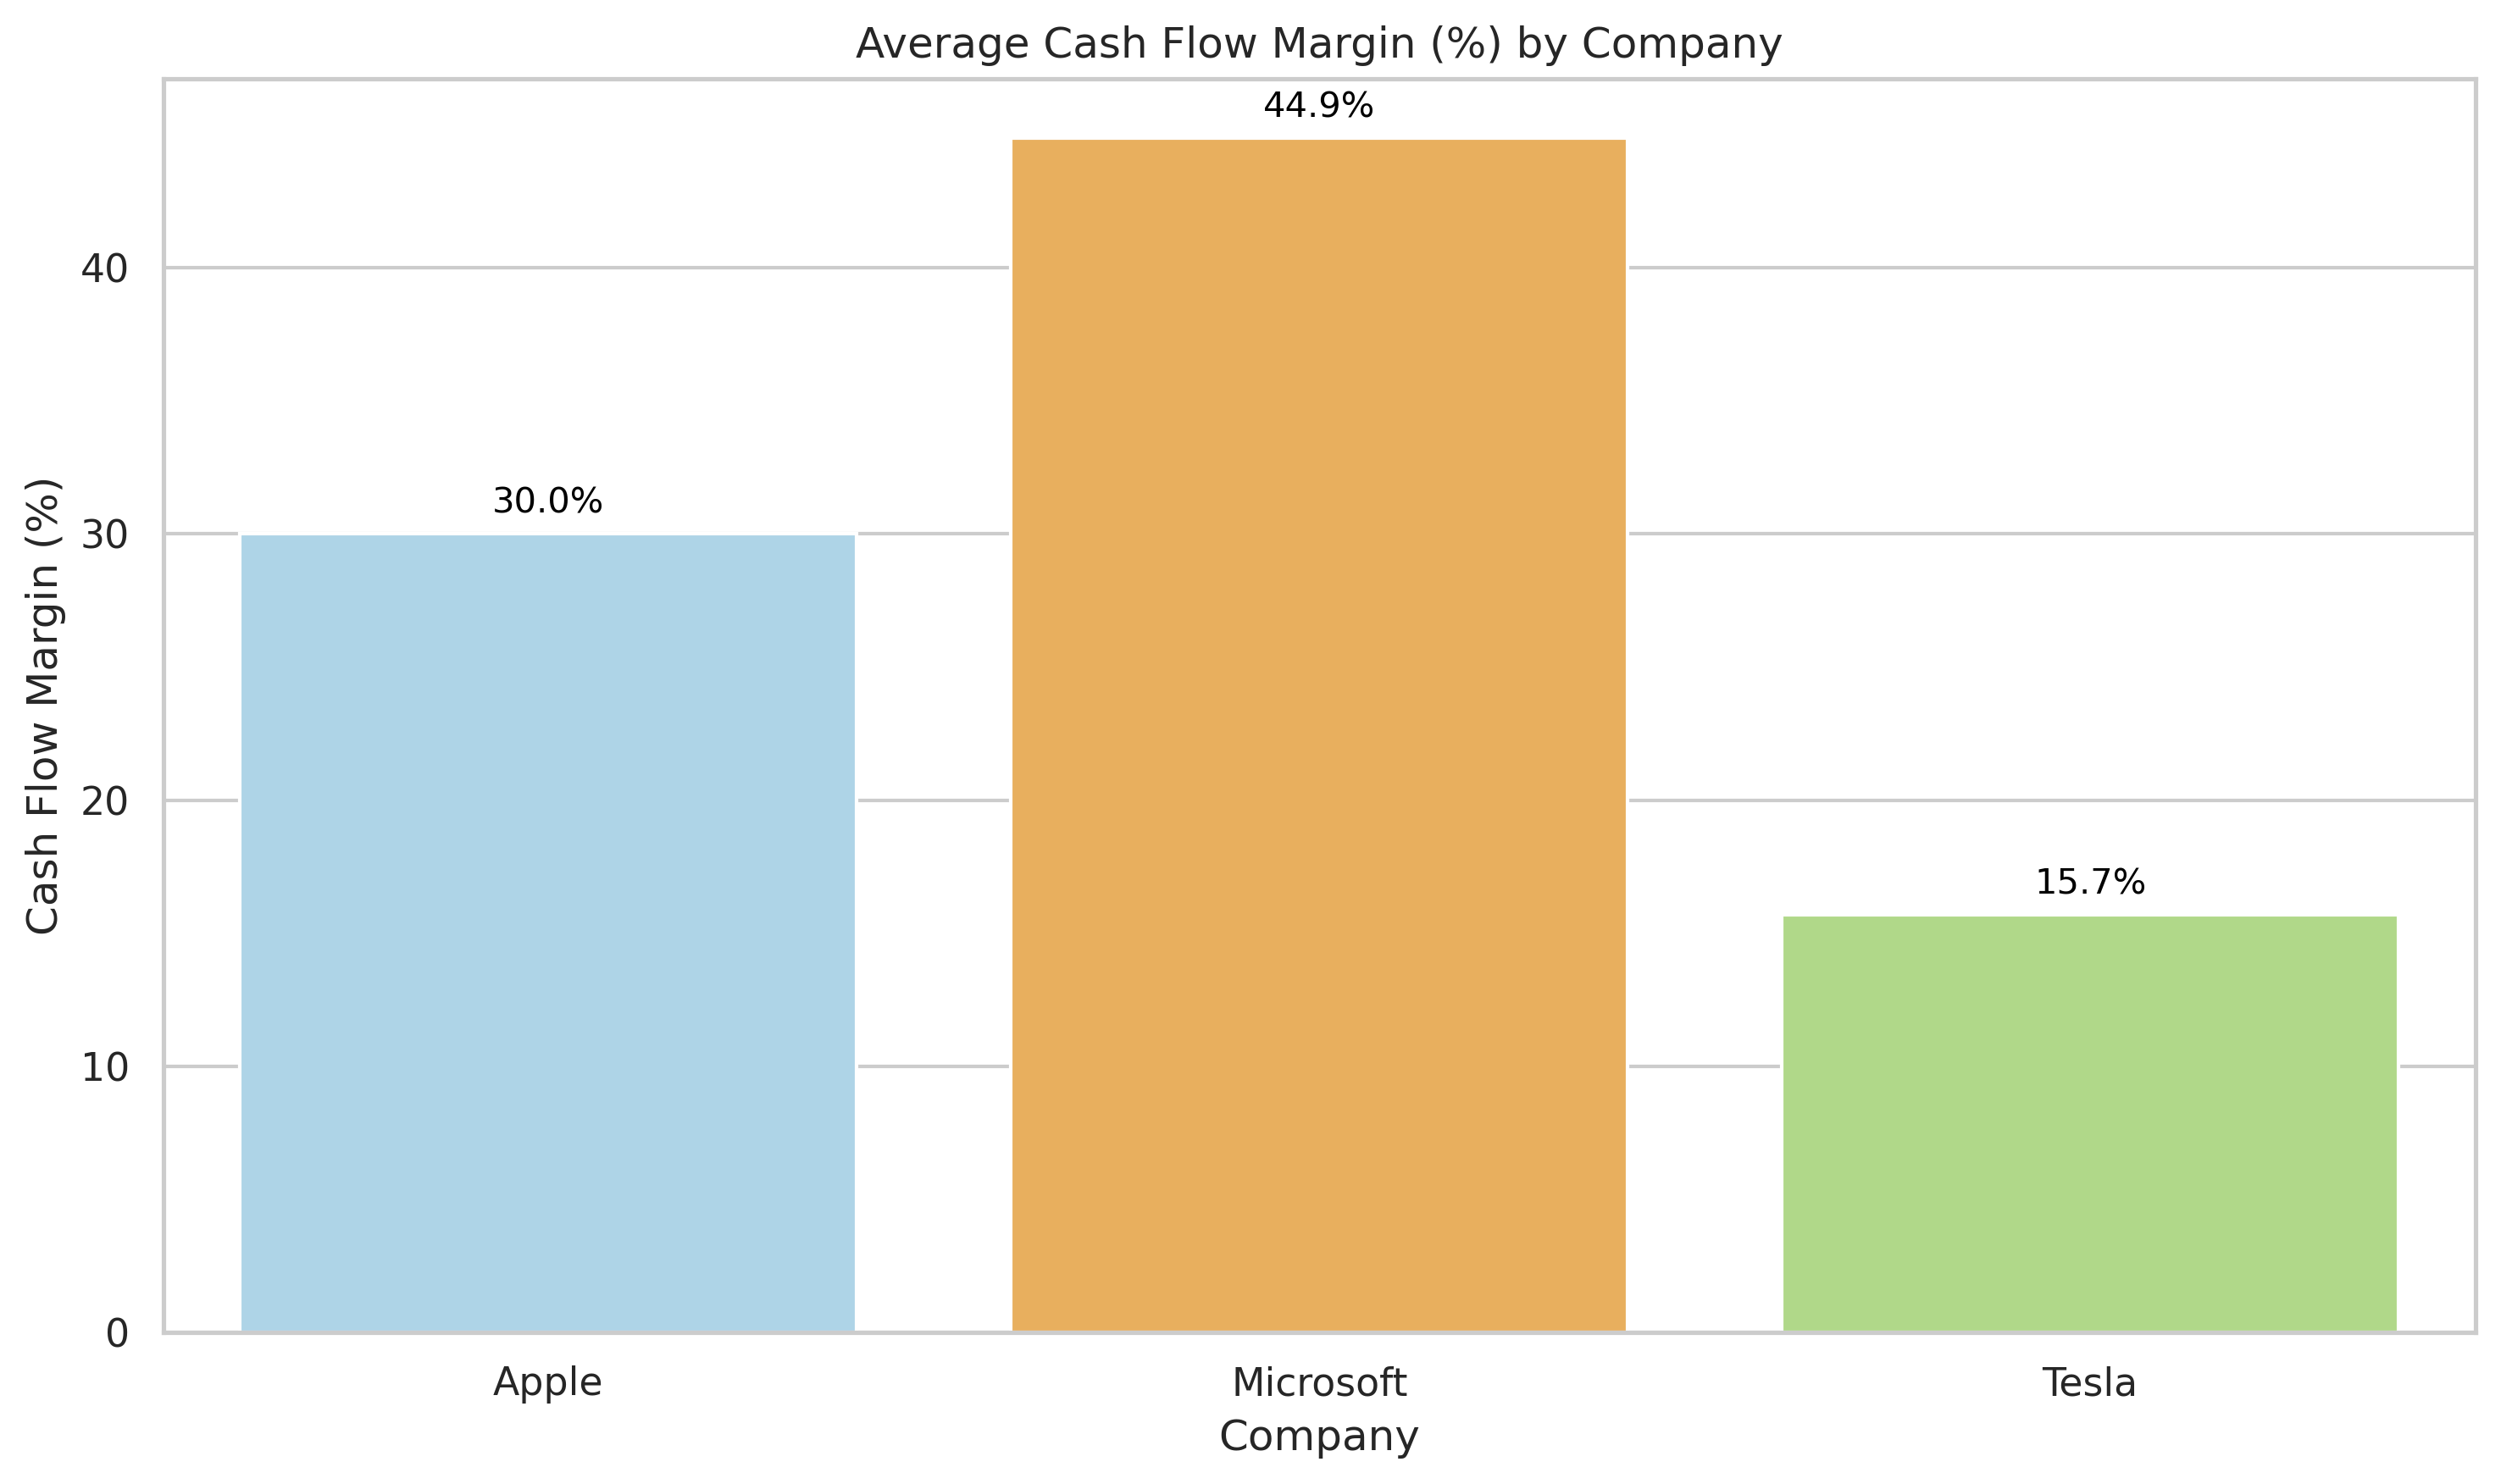

In [54]:
margins = ['Profit Margin (%)', 'Cash Flow Margin (%)']
for metric in margins:
    plt.figure(dpi=300)
    plot = sns.barplot(data=df, 
                x='Company', 
                y=metric, 
                errorbar=None, 
                estimator='mean',
                palette= {
                    'Apple': '#A4D8F0',      
                    'Microsoft': '#FFB347',  
                    'Tesla': '#B0E57C'},
                hue='Company',
                legend=False
                    )
    plt.title(f"Average {metric} by Company")
    plt.ylabel(metric)
    plt.xlabel("Company")

    for bar in plot.patches:
        height = bar.get_height()
        plot.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5, 
            f'{height:.1f}%',  
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )
        
    plt.tight_layout()
    plt.show()

### Microsoft
- Average Profit Margin: 35.6%
- Average Cash Flow Margin: 44.9%
- For every 1 dollar in revenue from FY2022 to FY2024, Microsoft keeps 0.36 dollar in profit and generates 0.45 dollar in actual operating cash.
- these margins are exceptionally high. This shows that Microsoft has highly profitable operations.

### Apple
- Profit Margin: 24.9%
- Cash Flow Margin: 30%
- Also quite efficient. For every dollar in sales, Apple keeps 0.25 dollar in profit and generates 0.30 dollar in cash.
- They're still the best in their class (hardware-focused company). This is impressive because hardware-heavy businesses typically have high COGS (Cost of Goods Sold) and a lot of inventory & supply chain risks.

### Tesla
- Tesla keeps only 0.13 dollar in profit and generates 0.16 dollar in cash per dollar of revenue.
- Still quite good. We also must not forget the fact that Tesla is a manufacturing-heavy company, which means they have a hard time dealing with profit and cash flow margins because they have to build gigafactories, source raw materials (like lithium and nickel), expensive R&D, and slow ROI (Return on Investment) because Tesla needs to sell a lot of cars just to break even.

The most efficient company is obviously Microsoft, followed by Apple, then Tesla.

# Financial Risk or Stability
This visualization highlights how much debt they use, showing financial safety and risk.

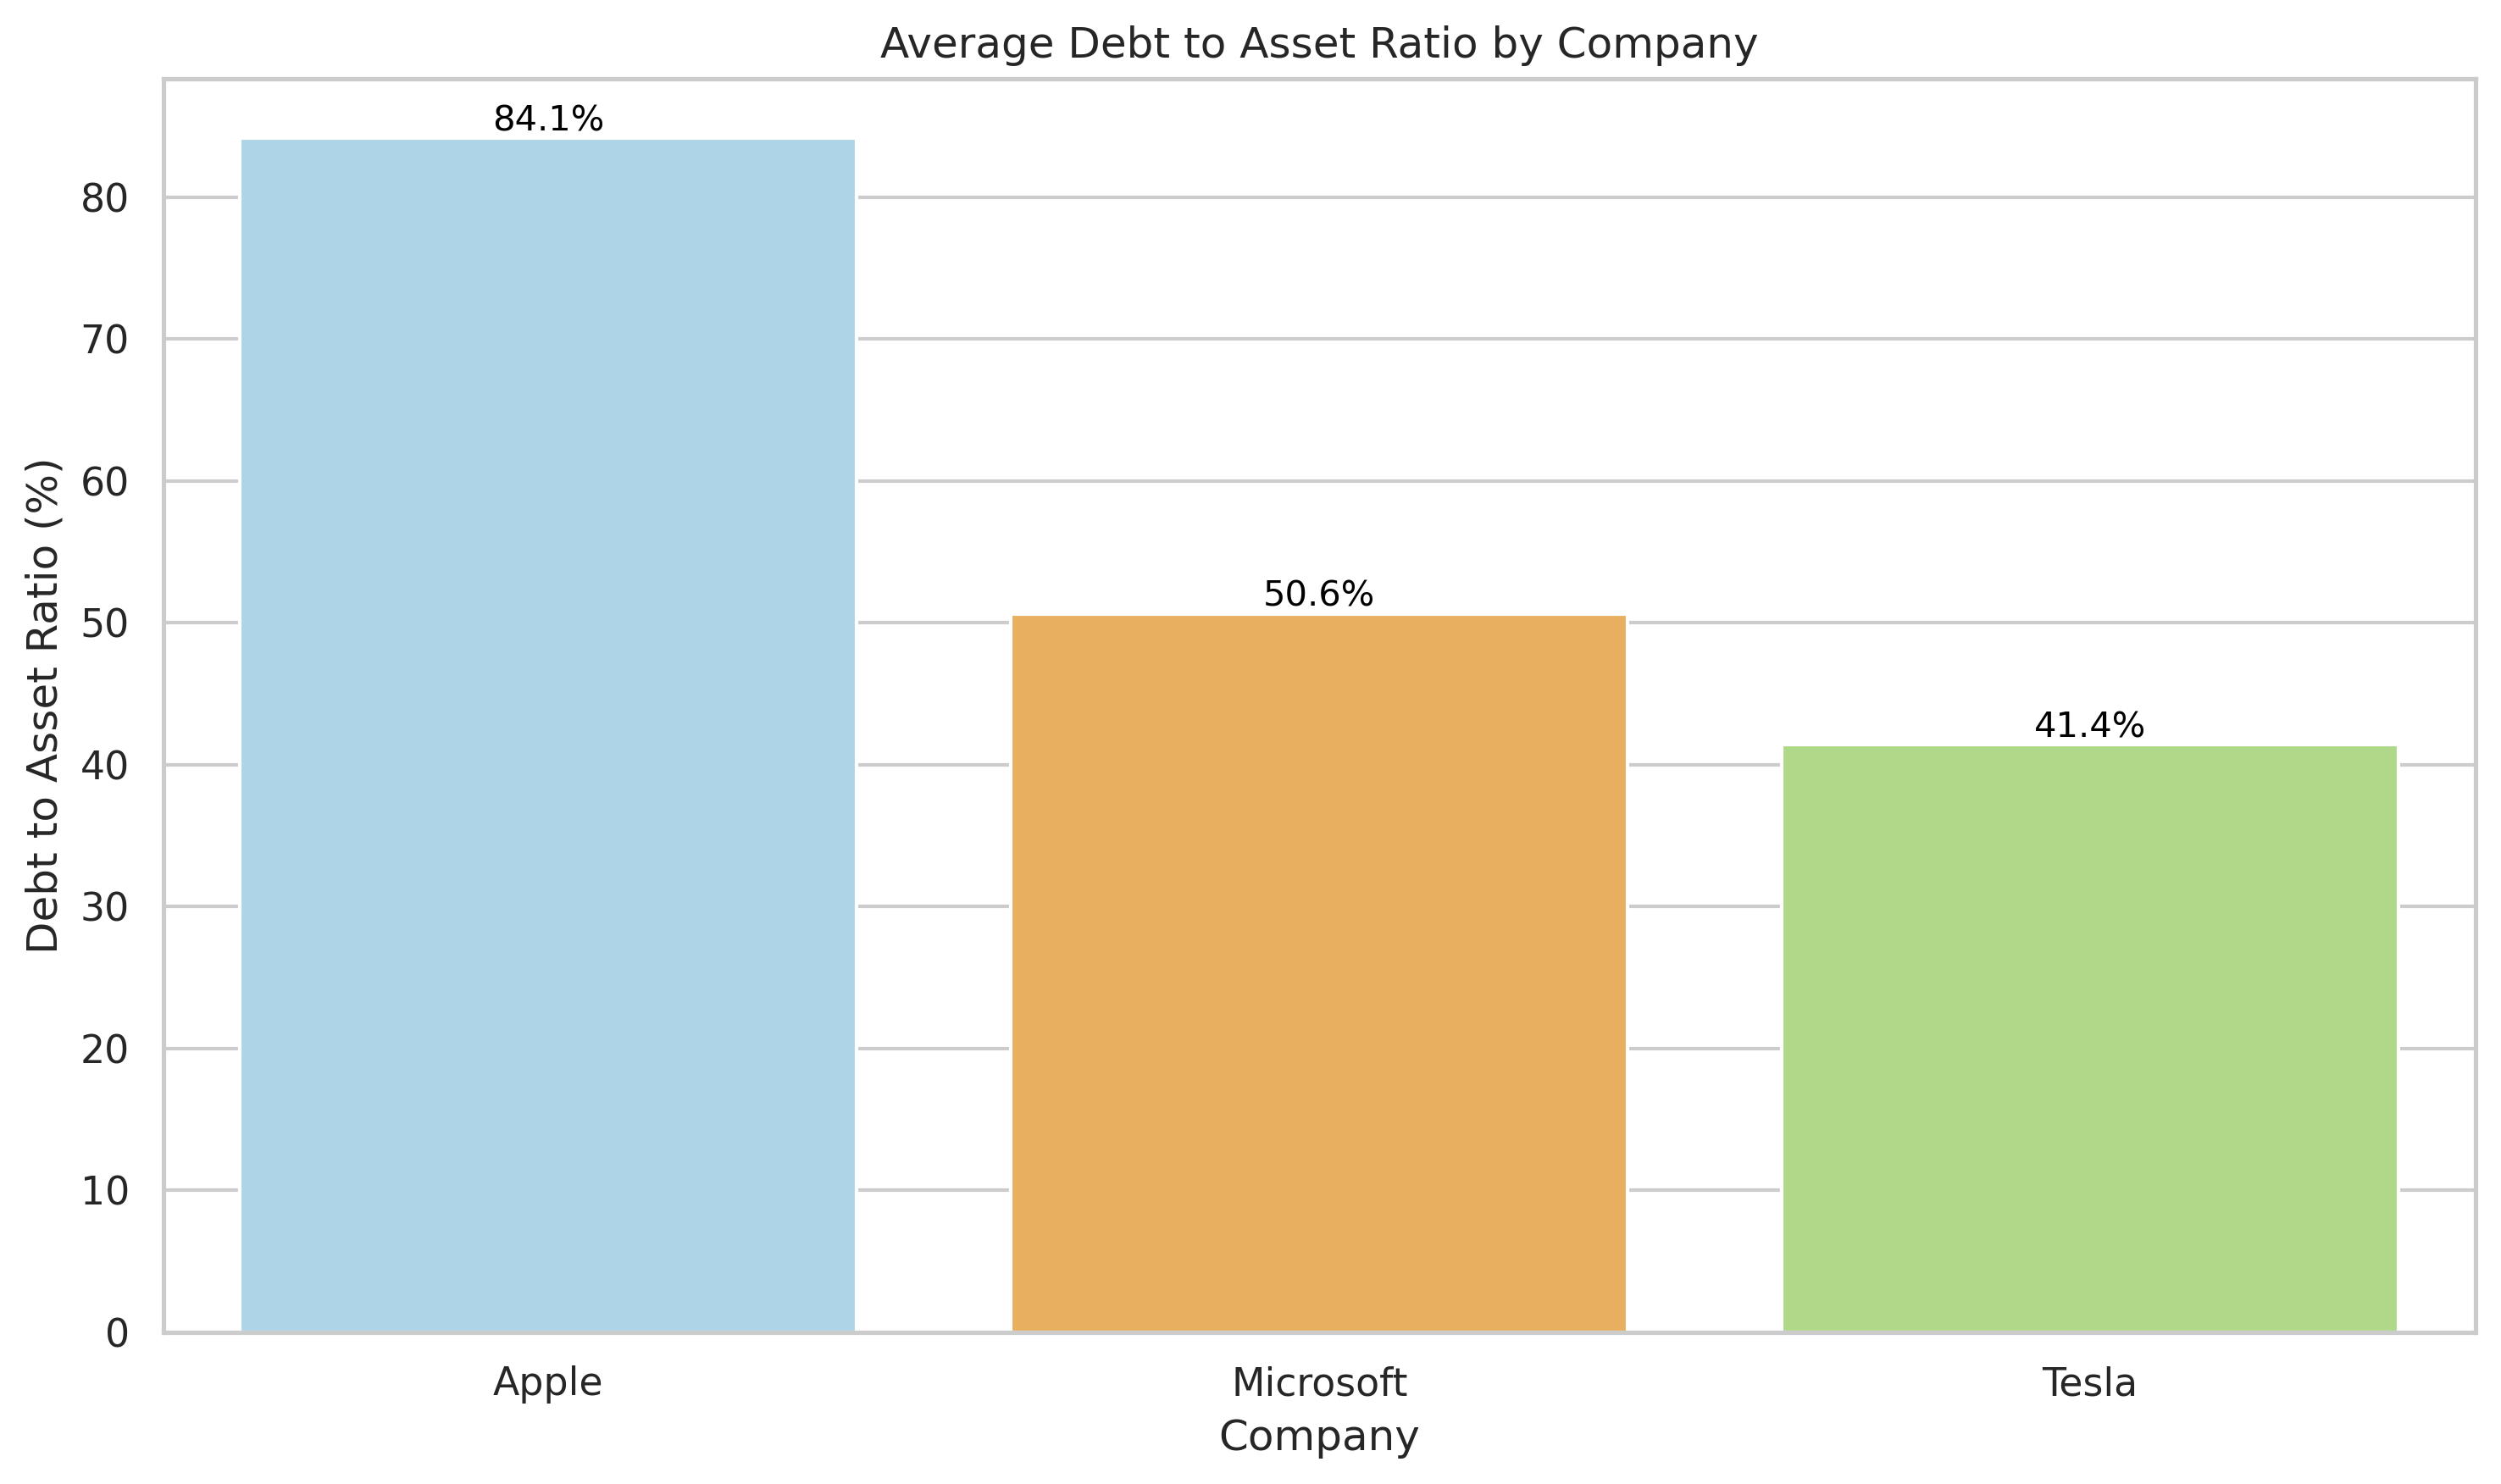

In [55]:
margin = ['Debt to Asset Ratio (%)']

for metric in margin:
    plt.figure(dpi=300)
    plot = sns.barplot(data=df, 
            x='Company', 
            y='Debt to Asset Ratio (%)', 
            errorbar=None, 
            estimator='mean',
            palette= {
                    'Apple': '#A4D8F0',      
                    'Microsoft': '#FFB347',  
                    'Tesla': '#B0E57C'},
            hue='Company',
            legend=False
           )

    for bar in plot.patches:
        value = bar.get_height()
        plot.annotate(
            f"{value:.1f}%",                
            (bar.get_x() + bar.get_width() / 2, value),  
            ha='center',
            va='bottom',
            fontsize=10,
            color='black')
    
plt.title("Average Debt to Asset Ratio by Company")
plt.ylabel("Debt to Asset Ratio (%)")
plt.xlabel("Company")
plt.tight_layout()
plt.show()

**Apple** with a debt-to-asset ratio of 84.1% clearly is taking the lead on the most financial risk. This basically means that 84.1% of Apple's total assets are funded with debt. Apple is very aggresive in using debt (likely because they have huge cash reserves, low interest rate on bonds, and very strong credit rating). Apple is mostly using debt to fund operations, not out of need, but likely for strategic financial reasons.

**Microsoft** slightly funds operations more with liabilities than equity (50.6% vs 49.4%). With massive net income and growing total assets, a 50.6% ratio reflects a well-managed, mature, and healthy capital structure. Moreover, Microsoft had over $80B in cash & short-term investments. They could cover much of their liabilities if needed.

**Tesla** has the lowest financial risk with a debt-to-asset ratio of 41.4%. Tesla's growth is mostly funded by equity. They had a high valuation (the market believed the company was worth a lot). For example: by 2020, Tesla had raised approximately US $10 billion in stock offerings within three months. Also, Tesla's equity funding is backed by rising shareholder equity: from about 45 billion dollars in 2022 to 73.6 billion dollars in 2024. As a result, these factors allowed Tesla to raise billions of dollars without needing to take on much debt, which maintains their lower debt-to-asset ratio. Tesla is less exposed to interest payments, refinancing risk, and debt covenant breaches.

## Growth Visualizations

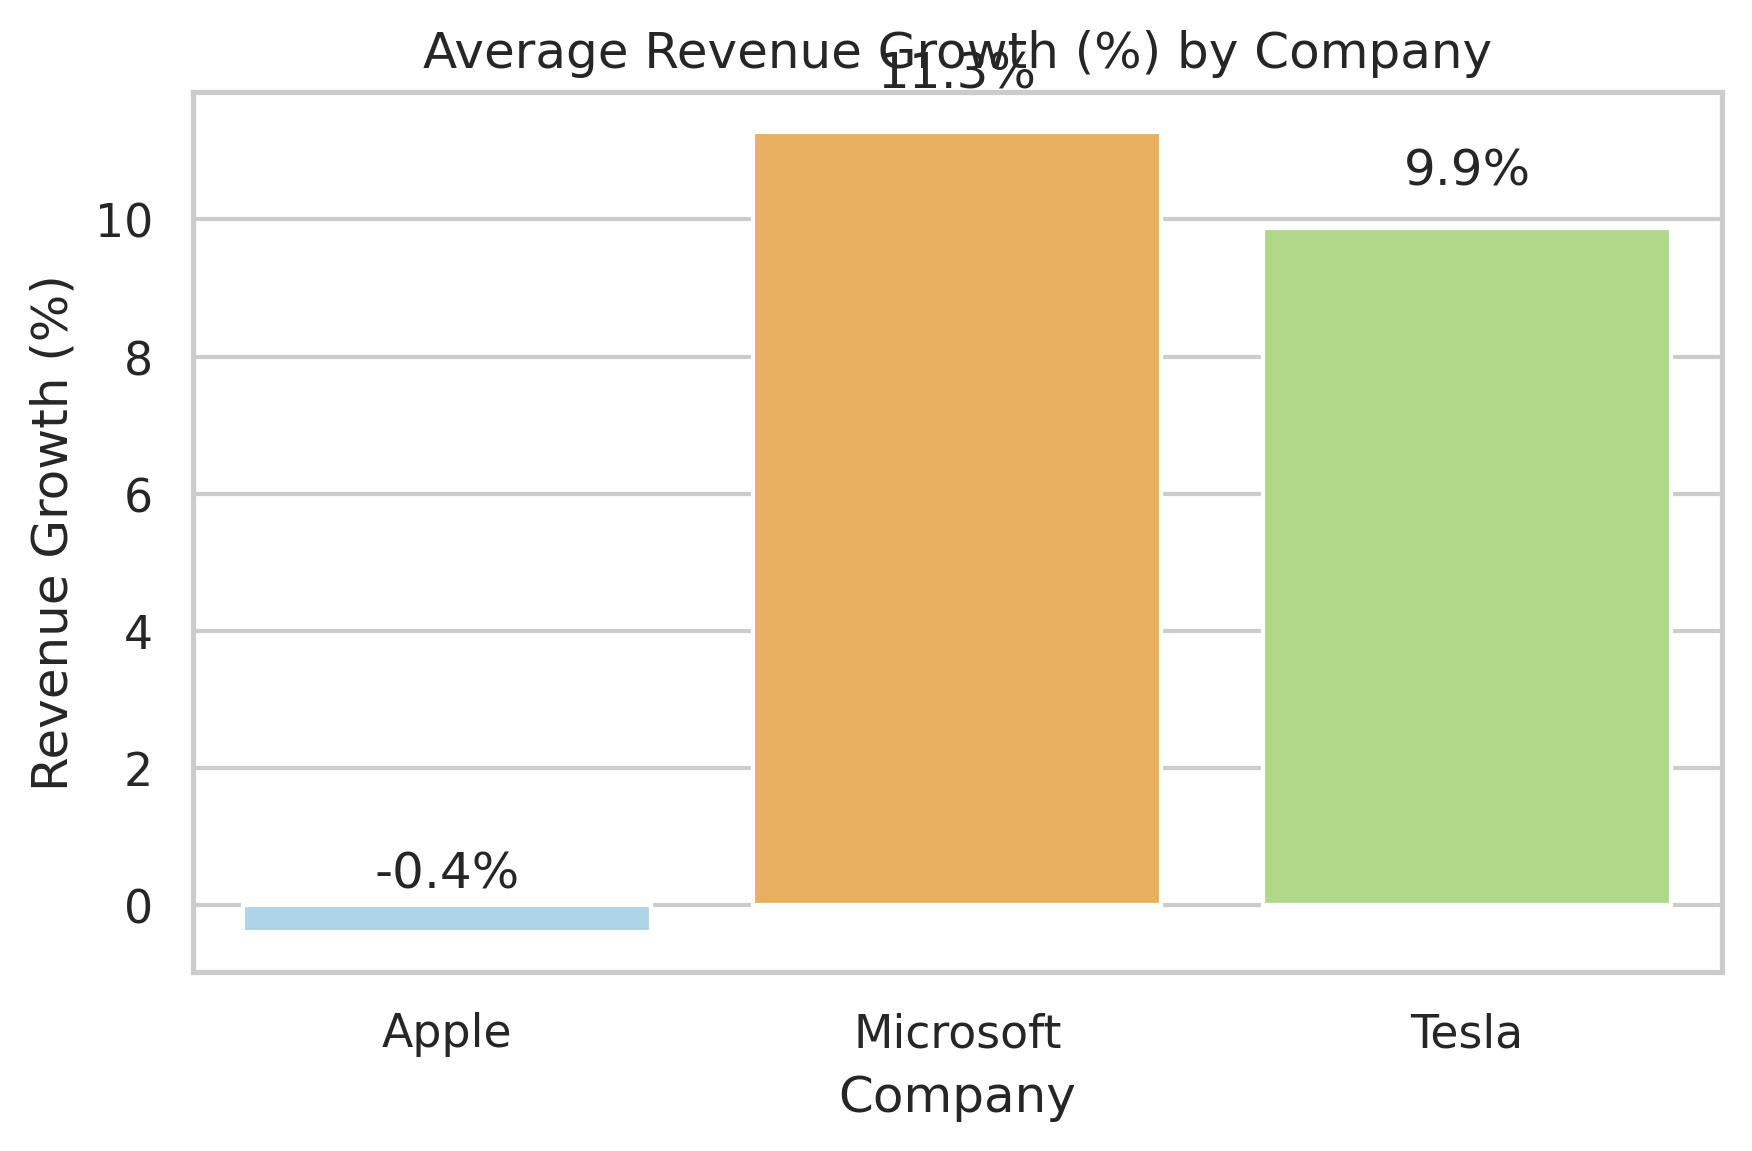

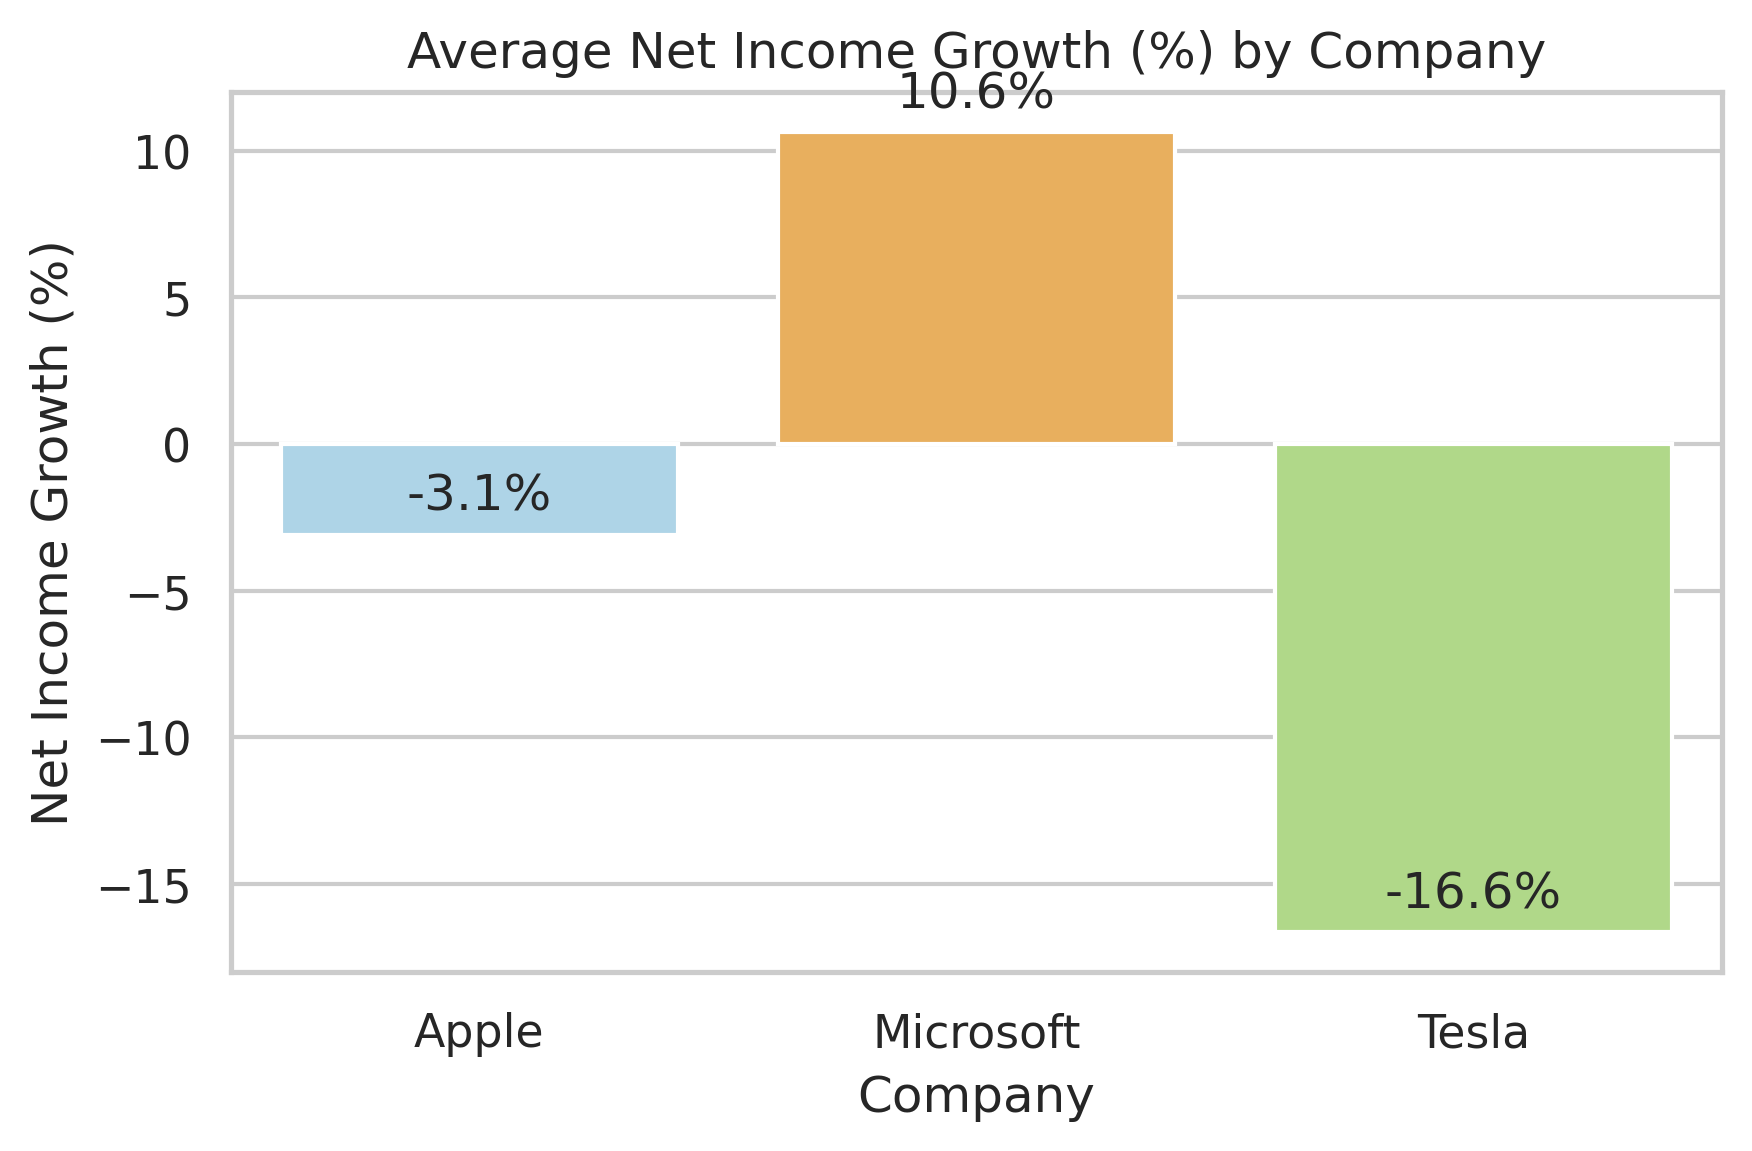

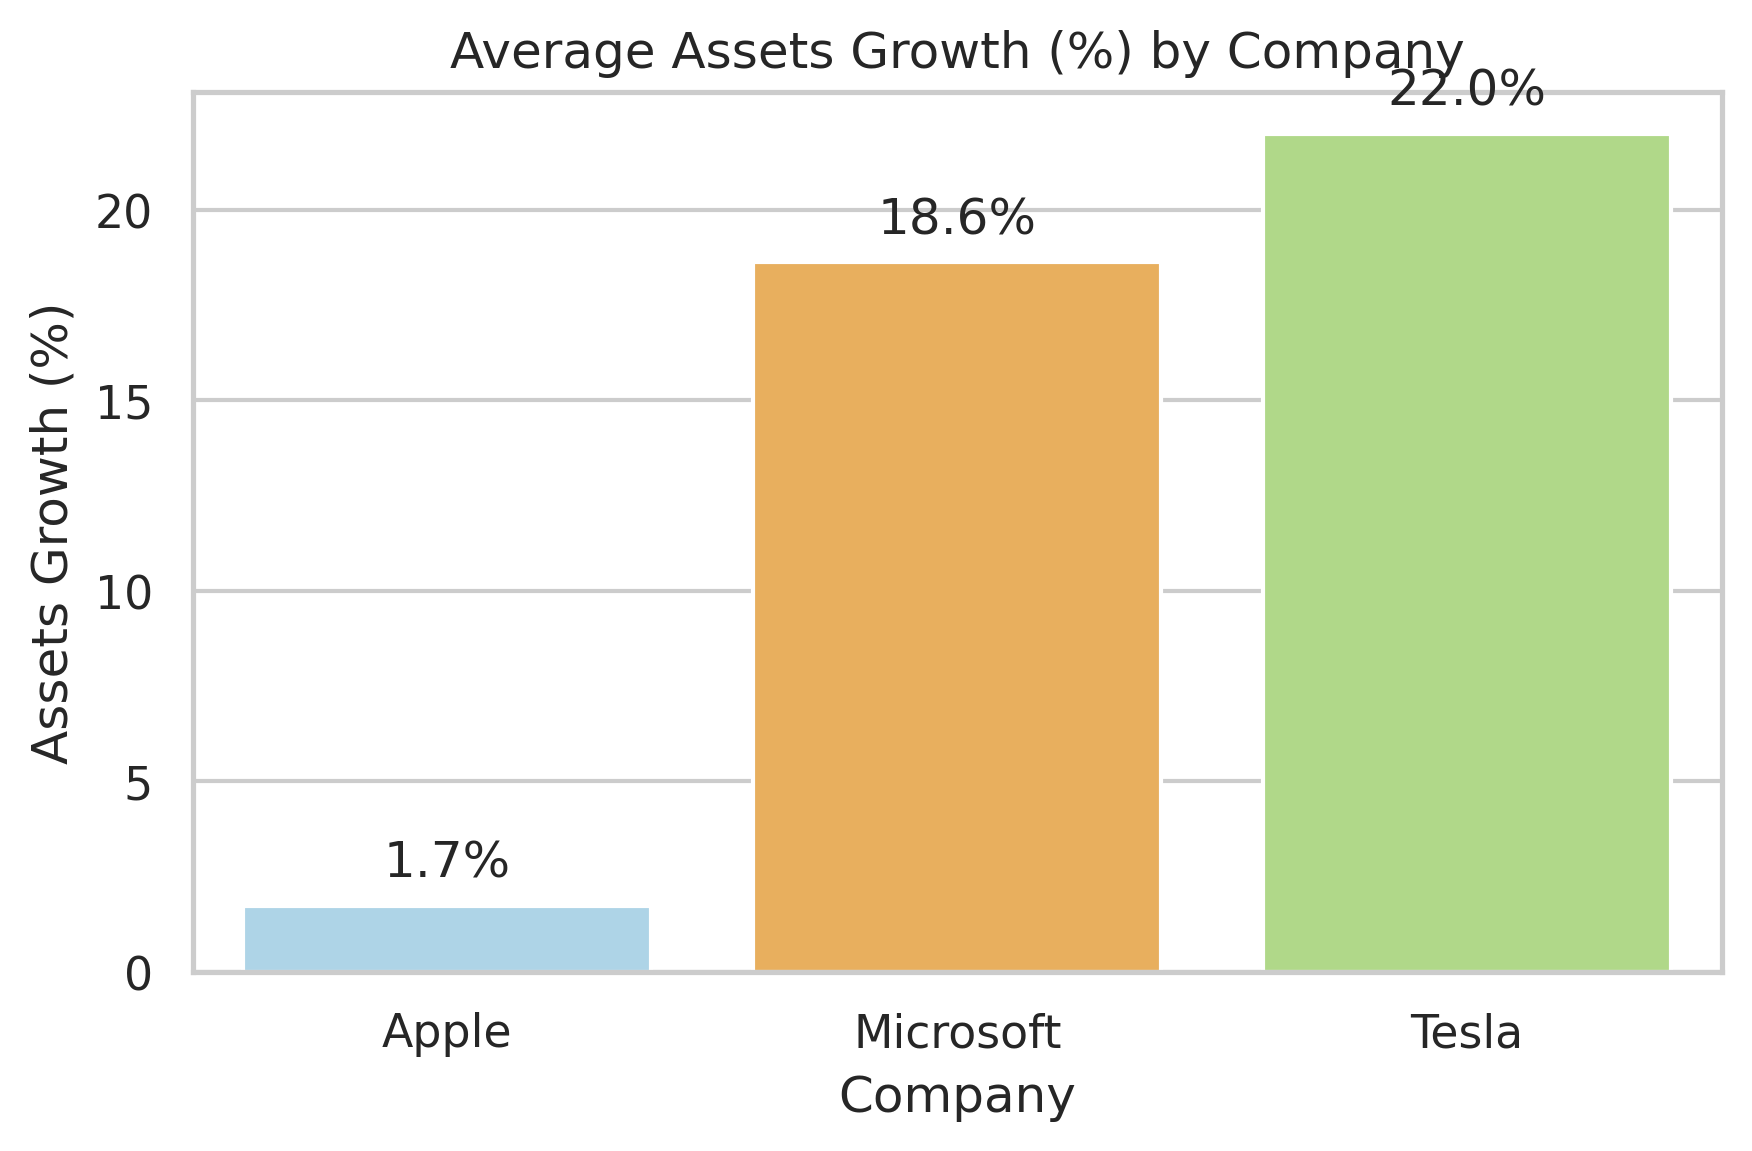

In [56]:
growth_metrics = ['Revenue Growth (%)', 'Net Income Growth (%)', 'Assets Growth (%)']

for metric in growth_metrics:
    plt.figure(figsize=(6, 4), dpi=300)
    ax = sns.barplot(
        data=df.dropna(subset=[metric]),
        x='Company',
        y=metric,
        estimator='mean',
        errorbar=None,
        palette= {'Apple': '#A4D8F0',      
                  'Microsoft': '#FFB347',  
                  'Tesla': '#B0E57C'},
        hue='Company',
        legend=False
    )
    plt.title(f"Average {metric} by Company")
    plt.ylabel(metric)
    plt.xlabel("Company")

    for bar in ax.patches:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                f'{height:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

**Apple** appears to be in a mature and stable phase with very minimal growth. Their revenue even declined (-0.4%) and it's net income also fell modestly (-3.1%), while it's asset growth is very low (1.7%). This suggests that Apple is not currently focused on aggresive expansion. They likely prefer to maintain market position, optimize operation, and return capital to shareholders.

**Microsot** stands out as the most improved and balanced among the three. Microsoft's revenue growth (11.3%), net income growth (10.6%), and significant asset expansion (18.6%) indicate that Microsoft successfully scaling their business while maintaining profitability and reinvesting strategically in infrastructure and innovation.

**Tesla** is in an unique position. Despite showing strong revenue growth (9.9%) and the fastest asset growth (22%), Tesla's net income growth is very negative (-16.6%), showing that their aggresive physical assets investments and global expansion efforts come with rising costs and margin pressure. Their short-term profitabiliy is being sacrificed. This is a classic pattern in a manufacturing company.

In [59]:
df.to_csv('financial_summary.csv', index=False)